# Ch.3 MySQL 전체 운영 실습

## Ch.3.1 요구사항 분석과 시스템 설계 그리고 모델링

### 1. 정보시스템 구축 절차 요약
  - 분석: What
  - 설계: How
  - 구현(구축, 빌드)
  - 시험
  - 유지보수

### 2. 데이터베이스 모델링과 필수 용어

- 데이터베이스 모델링
  - 분석과 설계 단계에서 중요하고 필수인 단계
  - 커뮤니케이션의 매개체
  - 현실 세계의 데이터를 DBMS에 어떻게옮겨놓을 것인지 결정하는 과정

- 후보 키(Candidate Key)
  - 로우를 다른 로우와 구별(식별)할 수 있는 컬럼(의 값)
  - Unique
  - 자연키(Natural Key) vs. 합성키(Synthetic Key), 인공키(Artificial Key)

- 기본 키(Primary Key: PK)
  - 테이블에서 로우를 유일하게 식별/지정할 수 있는 키(컬럼)
  - 특징
    - 유일(Unique)
    - 값이 반드시 존재(Not Null)
    - 테이블 당 하나만 가능
    - 대신 필요하다면 2개 이상의 컬럼을조합하여 하나의 PK로 설정 가능
  - 키 중에서 선택
    - 잘 변하지 않는 후보 키
    - 개인정보 또는 보안상 중요하지 않은 후보 키
    - 보안상 중요한 컬럼도 제외

- 외래 키(Foreign Key) ⇒ 참조 컬럼, 자식컬럼
  - 두 테이블의 관계(Relationship)을 맺어주는 키
  - 외래 키는 PK나 UK만을 참조 ⇒ 참조키라고도 함
    - 외래 키의 값은 참조하는 컬럼에 존재하는값 중에 하나이어야만 함 ⇒ 참조 제약 조건
  - 두 테이블 간의 참조 ⇒ 두 테이블의 조인
    - 조인을 하려면 반드시 FK가  설정되어야한다는 뜻은 아님
    - 하지만 FK 설정을 하지 않으면 부모 컬럼에 존재하지 않는 값이 자식 컬럼에 존재할 수도 있기 때문에 데이터 무결성이 깨질 수 있음

## Ch.3.2 MySQL을 이용한 데이터베이스 구축 절차

### 1. 데이터베이스 생성

### 2. 테이블 및 기타 데이터베이스 개체 생성

### 3. 데이터 입력

### 4. 데이터 활용(CRUD)
  - CRUD - Create, Read, Update, Delete
  - SQL ⇒ INSERT, SELECT, UPDATE, DELETE


### Schema == Database

### 5. 컬럼
  - 컬럼명
  - 컬럼 데이터 타입
  - NULL 허용 여부(생략하면 NULL 허용)
  - (필요하다면) 기본값
  - (필요하다면) 제약 조건
  

### 6. Query
  - 광의의 의미: 모든 SQL 문
  - 협의의 의미: SELECT 문
    - cf) query and dml  ⇒ SELECT and INSERT, UPDATE, DELETE


### 7. SQL 문의 구분
  - DML(Data Manipulation Language)
    - 대상: Data
    - SQL: I, U, D, Merge . . . . . . . .  SELECT
      - 협의의 DML: I, U, D, M
      - 광의의 DML: SELECT 문도 포함

  - DDL(Data Definition Language)
    - 대상: Database Objects
    - SQL: Create, Alter, Drop, …

  - DCL(Data Control Language)
    - 권한(Privileges), 트랜잭션(Transaction)
    - SQL: Grant 권한 To ~~~
      - Revoke 권한 From ~~~
      - Commit, Rollback, Savepoint


### 8. 인덱스
- 인덱스 및 사용 목적 : MySQL이 데이터를 모두 읽어서 특정 데이터를 찾기에는 과부하 및 시간이 오래걸리므로 빠르게 찾을 수 있도록 인덱스를 만들어서 진행 (실습 부분 참고)

### 9. 뷰 (View)
- 가상의 테이블
- SELECT 문에 이름 붙인 것 (a named SELECT (stored in DB))
- 접근 권한을 주어서 일부 필요한 데이터만 볼 수 있게 하는 기능 (정보 보호)

### 10. 스토어드 프로시져 (Stored Procecdure)
- 미리 만들어 두고 호출해서 사용하는 식으로 활용함 (병목현상 방지)
- cf) Stored Function도 있음

### MySQL 실습

In [9]:
# !pip install IPython
from IPython.display import Image
import os

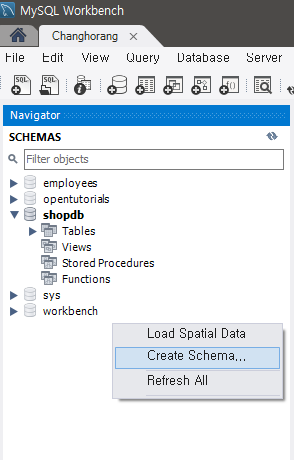

In [15]:
# 설치 및 자세한 사항은 책을 참고, 여기서는 명령어 정리
# cmd에서 접근하는 방법 : mysql -u root -p
os.chdir(r"C:\Users\ChangHo Kim\Desktop\이미지")
os.getcwd()

# Create schema
Image("create_schema.png")
# 명령어로는 CREATE SCHEMA "NAME";

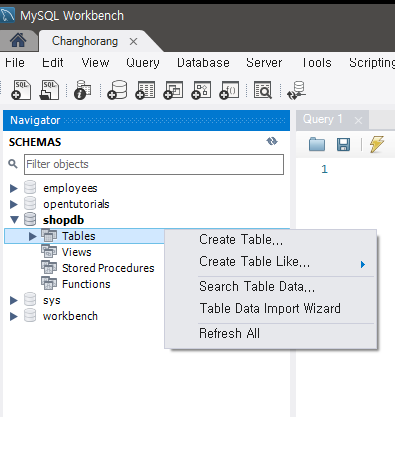

In [19]:
# Create table
Image("create_table.png")

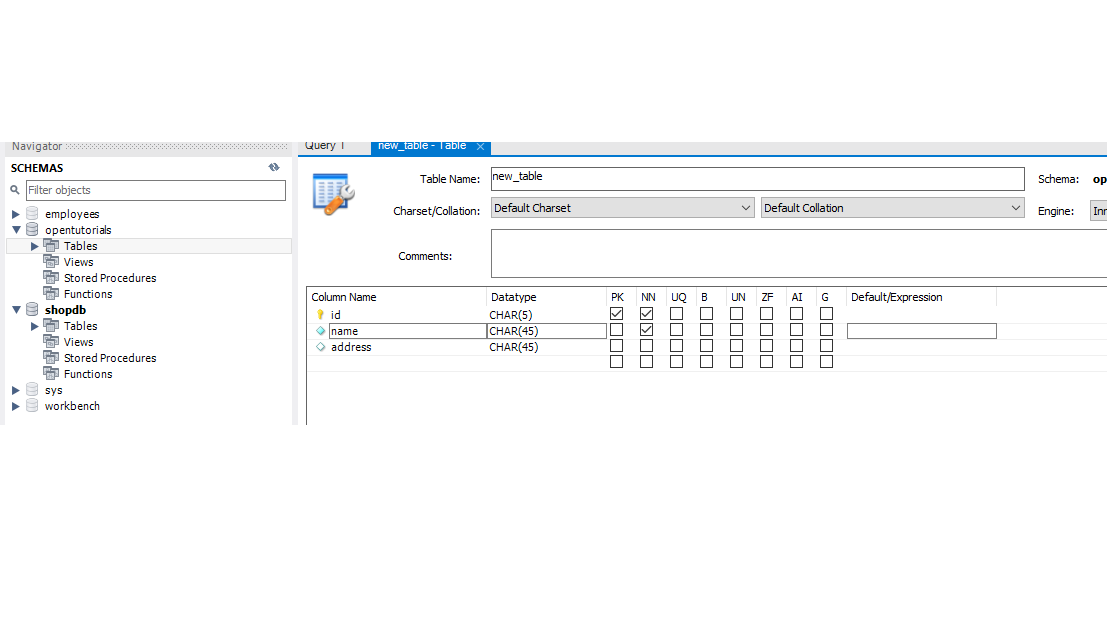

In [18]:
Image("create_table2.png")

### 테이블 만들기
- 위와 같은 테이블을 만들게 되면 코드는 아래와 같음

In [24]:
print("""
CREATE TABLE `opentutorials`.`new_table` (
  `id` CHAR(5) NOT NULL,
  `name` CHAR(45) NOT NULL,
  `address` CHAR(45) NULL,
  PRIMARY KEY (`id`));
""")


CREATE TABLE `opentutorials`.`new_table` (
  `id` CHAR(5) NOT NULL,
  `name` CHAR(45) NOT NULL,
  `address` CHAR(45) NULL,
  PRIMARY KEY (`id`));



### 데이터 조회 / 특정 데이터 추출하기

In [26]:
print("""
SELECT * FROM new_table;
""")

print("""
SELECT * FROM new_table WHERE id = '지운이';
""")


SELECT * FROM new_table;


SELECT * FROM new_table WHERE id = '지운이';



In [28]:
print("""
CREATE TABLE indexTBL (
	first_name VARCHAR(14),
    last_name VARCHAR(16),
    hire_date DATE);""")

# indexTBL에 내용 insert
print("""
INSERT INTO indexTBL
	SELECT first_name, last_name, hire_date
    FROM employees.employees
    LIMIT 500;
""")

# indexTBL 확인
print("""
SELECT * 
FROM indexTBL;
""")

# 특정 내용 찾기
print("""
SELECT * 
FROM indexTBL 
WHERE first_name = 'Mary';
""")

# 인덱스 만들기 (뻐룬 시간 단축이 가능함)
print("""
CREATE INDEX idx_indexTBL_firstname ON indexTBL(first_name);
""")


CREATE TABLE indexTBL (
	first_name VARCHAR(14),
    last_name VARCHAR(16),
    hire_date DATE);

INSERT INTO indexTBL
	SELECT first_name, last_name, hire_date
    FROM employees.employees
    LIMIT 500;


SELECT * 
FROM indexTBL;


SELECT * 
FROM indexTBL 
WHERE first_name = 'Mary';


CREATE INDEX idx_indexTBL_firstname ON indexTBL(first_name);



In [30]:
# View 만들기
print("""
CREATE VIEW uv_memberTBL
AS
	SELECT name, memberAddress
    FROM memberTBL;
""")
# view 결과 실행
print("""
SELECT *
FROM uv_membertbl;
""")


CREATE VIEW uv_memberTBL
AS
	SELECT name, memberAddress
    FROM memberTBL;


SELECT *
FROM uv_membertbl;



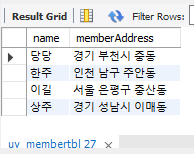

In [33]:
Image("view.png")

In [31]:
# Stored Procedure 만들기 & SELECT문 여러개 실행하기 (DELIMITER 이용하기)
print("""
DELIMITER //
CREATE PROCEDURE myProc()
BEGIN
	SELECT * FROM memberTBL WHERE name = '상주';
	SELECT * FROM productTBL WHERE productName = '냉장고';
END //
DELIMITER ;

CALL myProc()
""")


DELIMITER //
CREATE PROCEDURE myProc()
BEGIN
	SELECT * FROM memberTBL WHERE name = '상주';
	SELECT * FROM productTBL WHERE productName = '냉장고';
END //
DELIMITER ;

CALL myProc()



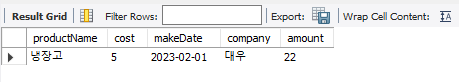

In [32]:
Image("storedprocedure.png")